# Problem Statement

A National Park in India is dealing with the problem of segregation of its species based on the different attributes they have. Build a KNN model to automatically classify new species. Explain any inferences you draw in the documentation.

Lets Load our Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

We will now load our dataset

In [2]:
data = pd.read_csv("Zoo.csv")
data.shape

(101, 18)

We have 101 rows and 18 columns

Lets see the head of the data and names of these columns

In [3]:
data.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [4]:
data.columns

Index(['animal name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'type'],
      dtype='object')

We can let go Animal name from our dataset as it does not provide any information to us

We are creating a new dataframe as df where `Animal Name` will not be there

In [13]:
df = data.iloc[:,1:]

In [14]:
df

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


Let see if we have any missing values in our data and what are the data types in our df

In [15]:
df.dtypes

hair        int64
feathers    int64
eggs        int64
milk        int64
airborne    int64
aquatic     int64
predator    int64
toothed     int64
backbone    int64
breathes    int64
venomous    int64
fins        int64
legs        int64
tail        int64
domestic    int64
catsize     int64
type        int64
dtype: object

They all are integers

<AxesSubplot:>

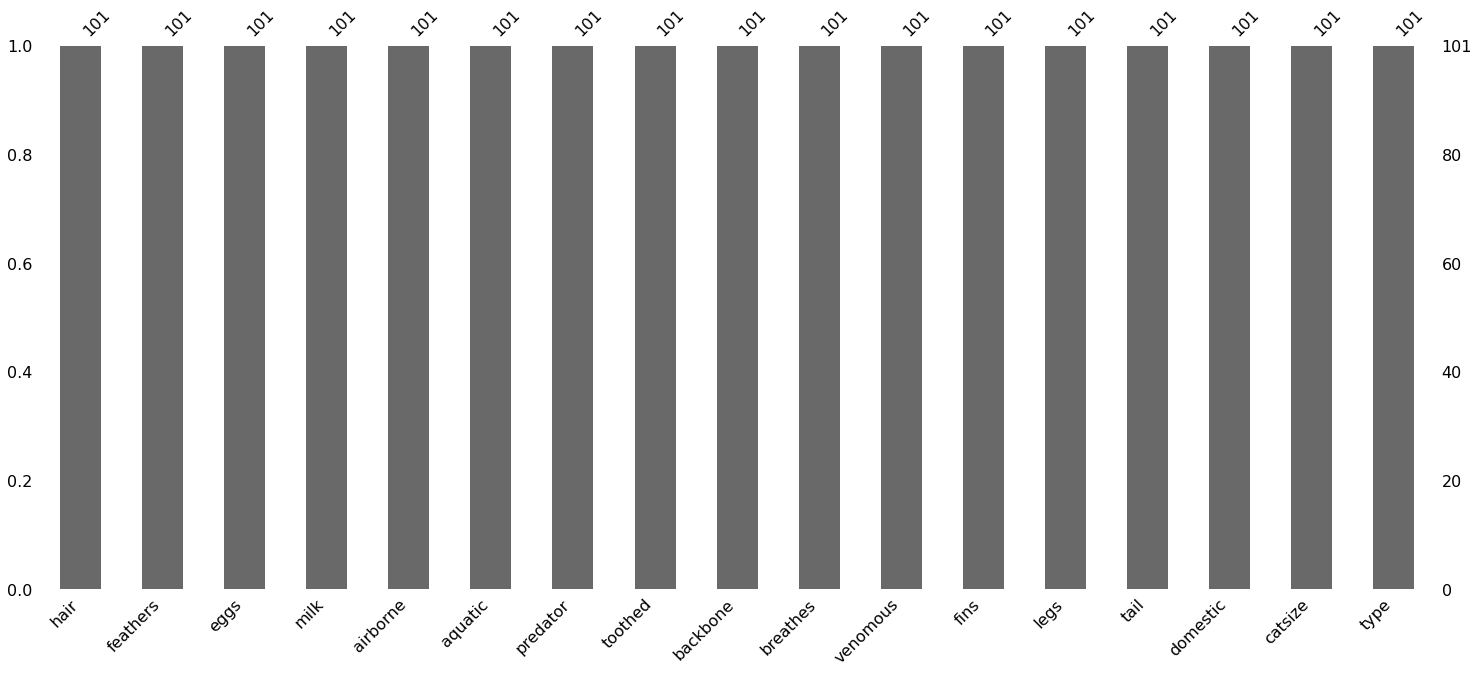

In [16]:
msno.bar(df)

No Missing value in our dataframe

### We will start EDA on our data frame

Lets look at 1st business moment

In [17]:
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


<AxesSubplot:>

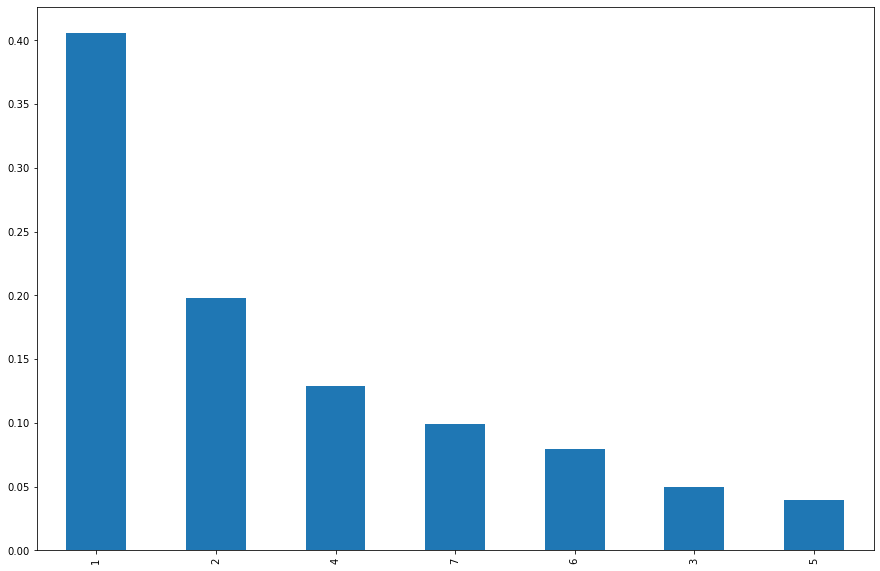

In [22]:
plt.rcParams['figure.figsize']=(15,10)
ybreak_up = df['type'].value_counts()/df.shape[0]
ybreak_up.plot(kind='bar')

Since `Type` column is our Y variable. Break up of Y 

Lets see the correlation between variables

<AxesSubplot:>

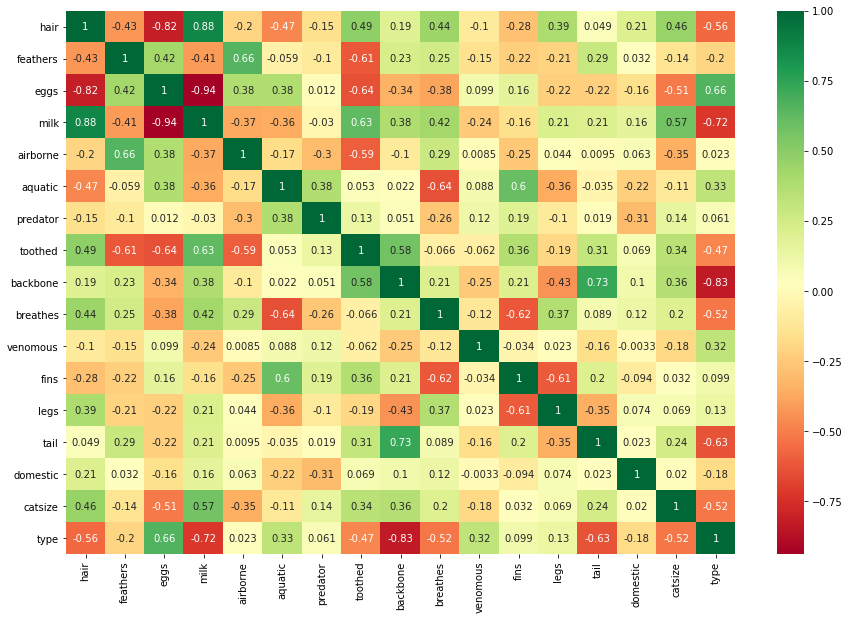

In [26]:
sns.heatmap(df.corr(), annot=True,cmap="RdYlGn")

There are lot of values which are highly correlated with each other.

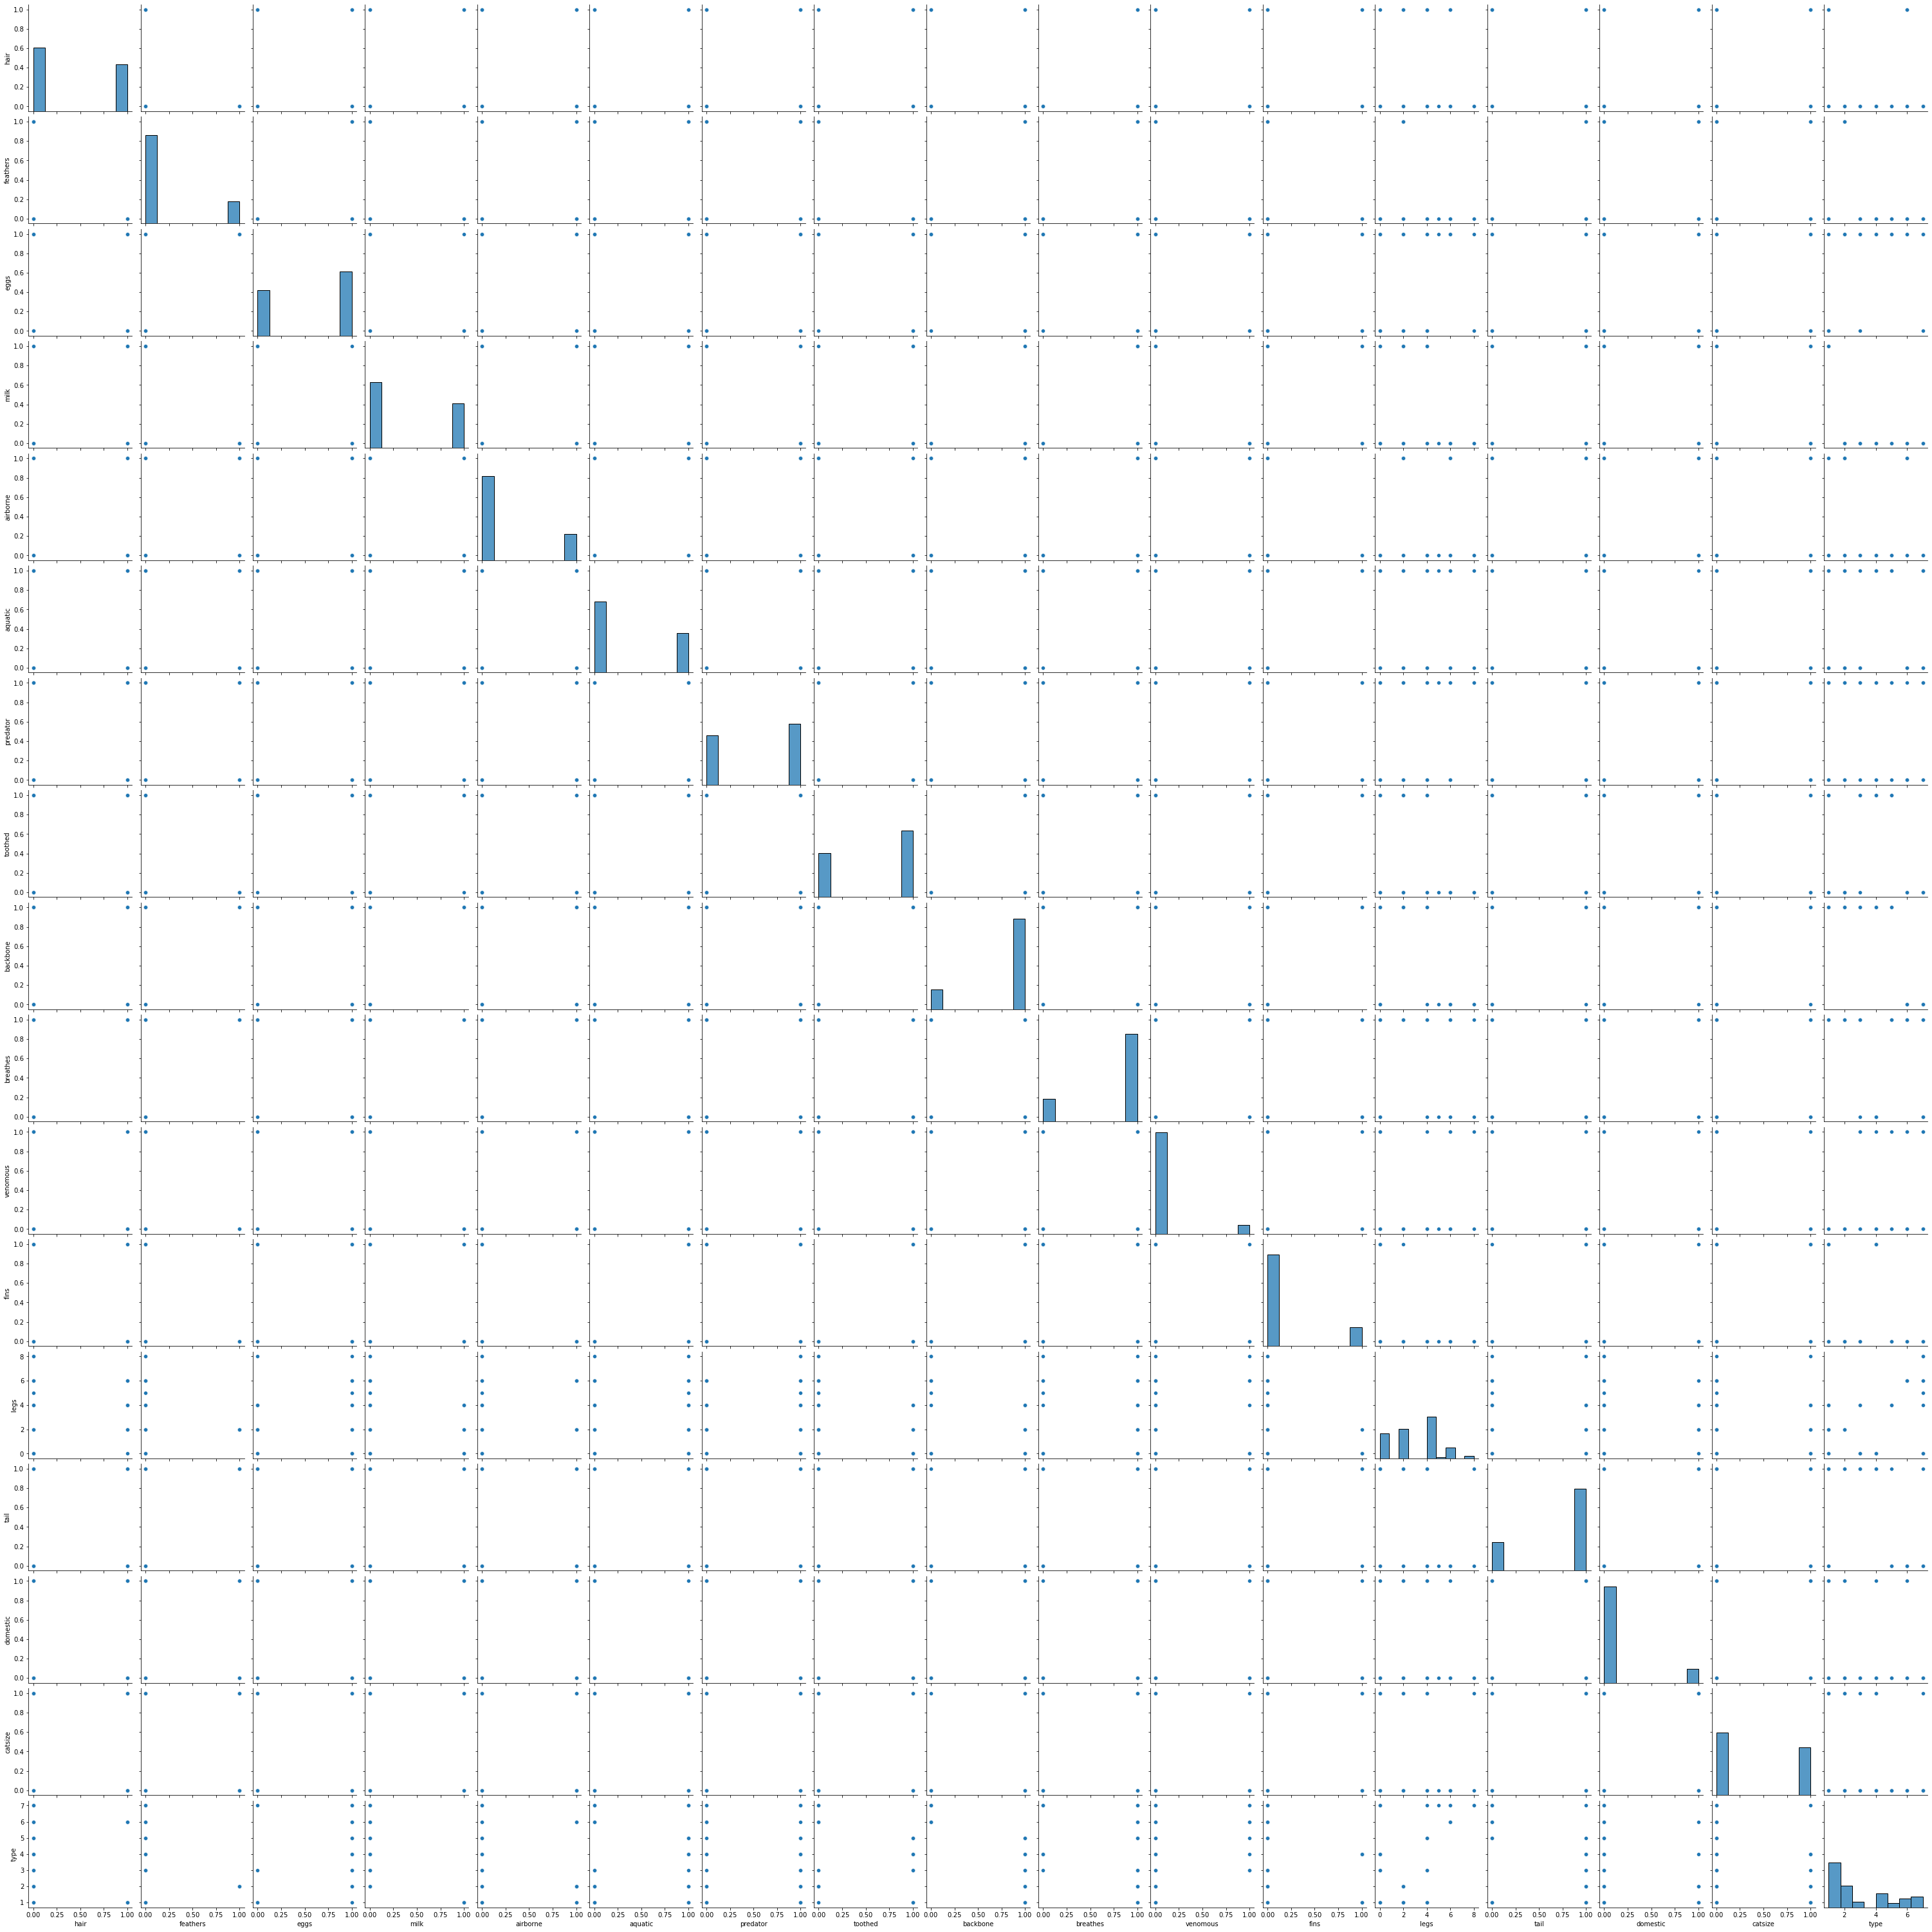

In [27]:
sns.pairplot(df)

# Not a good chart

<AxesSubplot:>

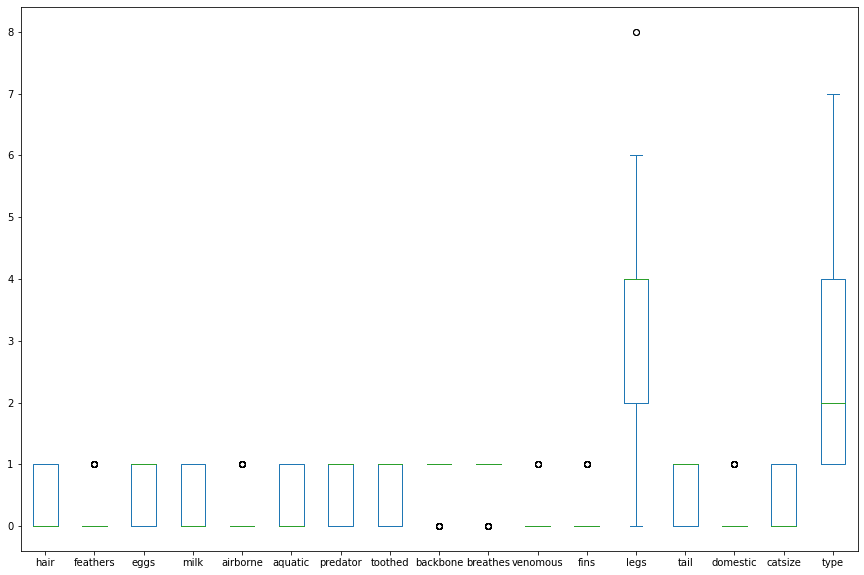

In [29]:
df.plot(kind='box')

Seems like we have some outliers in our dataset

Lets look for number of outliers in our dataset

In [30]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

IQR = Q3 - Q1

outliers = (df < (Q1- 1.5* IQR)) | (df > (Q3 + 1.5 * IQR))
outliers.sum()

hair         0
feathers    20
eggs         0
milk         0
airborne    24
aquatic      0
predator     0
toothed      0
backbone    18
breathes    21
venomous     8
fins        17
legs         2
tail         0
domestic    13
catsize      0
type         0
dtype: int64

## We will not build models for our dataset

We will build three models

- First one would be without any transformation
- Second one would be outliers treatment
- Third would be with Transformation

Lets split our data into Train and Test of 70:30 ratio

In [32]:
from sklearn.model_selection import train_test_split

In [36]:
Y = df.iloc[:,-1]
X = df.iloc[:,0:16]

In [37]:
Y

0      1
1      1
2      4
3      1
4      1
      ..
96     1
97     6
98     1
99     7
100    2
Name: type, Length: 101, dtype: int64

In [38]:
X

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [39]:
import random

In [41]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3,random_state=111)
print(X_train.shape, X_test.shape,Y_train.shape, Y_test.shape)

(70, 16) (31, 16) (70,) (31,)


In [42]:
from sklearn.neighbors import KNeighborsClassifier

Radomly selecting n_neighbor of 5

In [43]:
knn = KNeighborsClassifier(n_neighbors=5)

In [44]:
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [45]:
pred = knn.predict(X_test)
pred

array([6, 1, 6, 2, 1, 2, 1, 6, 2, 4, 1, 4, 1, 2, 4, 1, 1, 1, 6, 1, 6, 7,
       1, 1, 4, 4, 1, 4, 2, 1, 4], dtype=int64)

In [46]:
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test,pred))
pd.crosstab(Y_test,pred,rownames=['Actual'], colnames=['Predictions'])

0.7096774193548387


Predictions,1,2,4,6,7
Actual,,,,,
1,8,0,0,0,0
2,0,5,0,0,0
3,2,0,1,0,0
4,0,0,6,0,0
5,3,0,0,0,0
6,0,0,0,2,0
7,0,0,0,3,1


In [47]:
pred_train = knn.predict(X_train)
print(accuracy_score(Y_train,pred_train))
pd.crosstab(Y_train,pred_train,rownames=['Actual'], colnames = ['Predictions'])

0.9142857142857143


Predictions,1,2,4,6,7
Actual,,,,,
1,33,0,0,0,0
2,0,15,0,0,0
3,0,0,2,0,0
4,0,0,7,0,0
5,1,0,0,0,0
6,0,0,0,6,0
7,0,0,0,3,3


With random selection of n = 5, we are getting Training accuracy of 71% and Test accuracy of 91%

Lets see if we select n between 1 to 15 what is the accuracy of each n

In [48]:
acc = []

for i in range(1,15,1):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train, Y_train)
    train_acc = np.mean(neigh.predict(X_train) == Y_train)
    test_acc = np.mean(neigh.predict(X_test) == Y_test)
    acc.append([train_acc,test_acc])

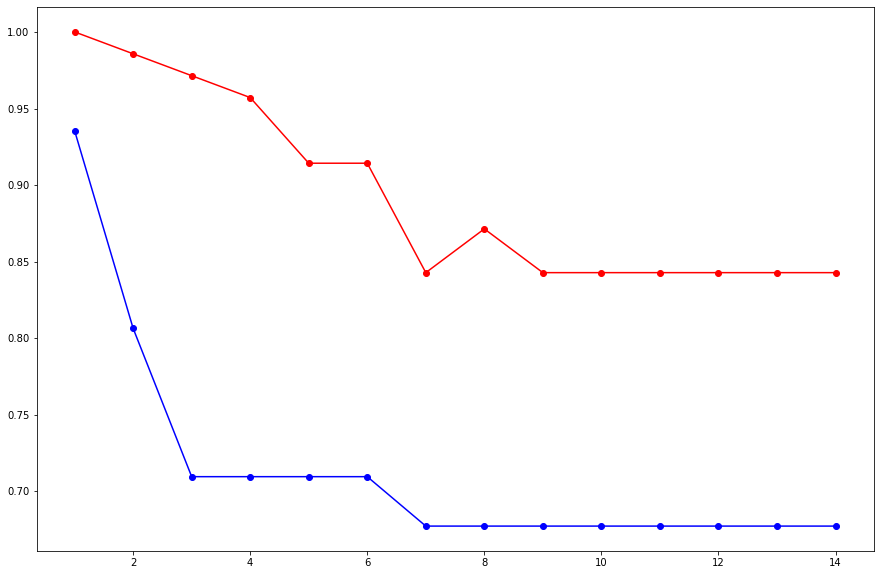

In [50]:
plt.plot(np.arange(1,15,1),[i[0] for i in acc],"ro-") # Training Accuracy
plt.plot(np.arange(1,15,1),[i[1] for i in acc], "bo-") # Test Accuracy

Without any transformation we can see our Test Accuracy is not good, lets work on the outliers and see if it improves our testing

In [52]:
from feature_engine.outliers import Winsorizer

In [53]:
df.columns

Index(['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator',
       'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail',
       'domestic', 'catsize', 'type'],
      dtype='object')

In [54]:
winsor = Winsorizer(capping_method='iqr',
                   tail='both',
                   fold = 1.5,
                   variables = ['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator',
       'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail',
       'domestic', 'catsize'])
df_t = winsor.fit_transform(df[['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator',
       'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail',
       'domestic', 'catsize']])
df_t

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,4.0,0.0,0.0,1.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,4.0,1.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,4.0,0.0,0.0,1.0
4,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,4.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,2.0,1.0,0.0,1.0
97,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,6.0,0.0,0.0,0.0
98,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,4.0,1.0,0.0,1.0
99,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [56]:
df_t['Type'] = df['type']
df_t

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,Type
0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,4.0,0.0,0.0,1.0,1
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,4.0,1.0,0.0,1.0,1
2,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,4
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,4.0,0.0,0.0,1.0,1
4,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,4.0,1.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,2.0,1.0,0.0,1.0,1
97,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,6.0,0.0,0.0,0.0,6
98,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,4.0,1.0,0.0,1.0,1
99,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,7


In [57]:
Y = df_t.iloc[:,-1]
X = df_t.iloc[:, 0:16]

In [58]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=111)

print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(70, 16) (31, 16) (70,) (31,)


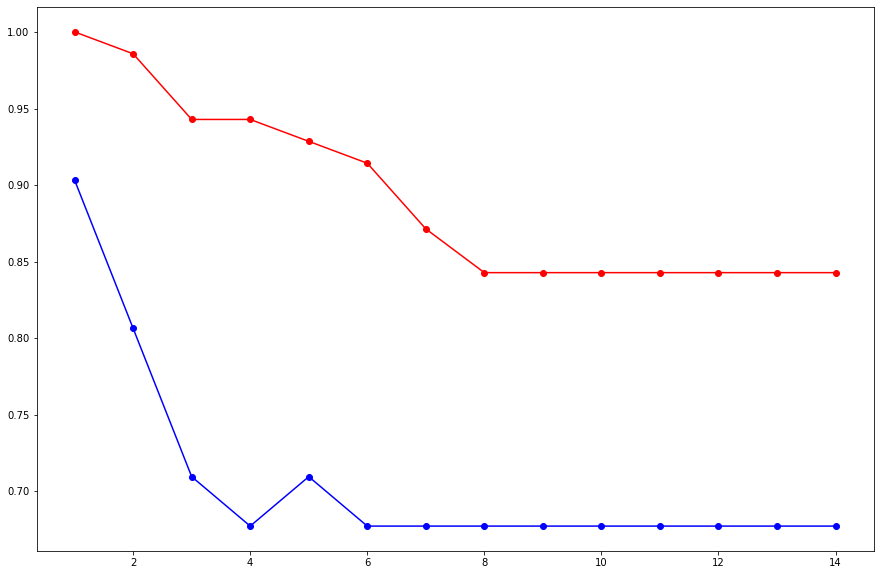

In [60]:
# creating empty list variable 
acc = []

for i in range(1,15,1):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train, Y_train)
    train_acc = np.mean(neigh.predict(X_train) == Y_train)
    test_acc = np.mean(neigh.predict(X_test) == Y_test)
    acc.append([train_acc,test_acc])

plt.plot(np.arange(1,15,1),[i[0] for i in acc],"ro-") # Training Accuracy
plt.plot(np.arange(1,15,1),[i[1] for i in acc], "bo-") # Test Accuracy

Even with outliers treatment, not getting good Testing results

Lets Standardise our dataset

In [62]:
from sklearn.preprocessing import StandardScaler

In [63]:
scaler = StandardScaler()

In [64]:
scaled = df_t.copy()
scaled

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,Type
0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,4.0,0.0,0.0,1.0,1
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,4.0,1.0,0.0,1.0,1
2,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,4
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,4.0,0.0,0.0,1.0,1
4,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,4.0,1.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,2.0,1.0,0.0,1.0,1
97,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,6.0,0.0,0.0,0.0,6
98,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,4.0,1.0,0.0,1.0,1
99,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,7


In [65]:
cols = df_t.iloc[:,0:16].columns
cols

Index(['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator',
       'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail',
       'domestic', 'catsize'],
      dtype='object')

In [66]:
d = scaler.fit_transform(scaled.iloc[:,0:16])
d = pd.DataFrame(d, columns = cols)
d

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1.161395,0.0,-1.185227,1.209717,0.0,-0.744208,0.896421,0.809776,0.0,0.0,0.0,0.0,0.595939,-1.698416,0.0,1.138180
1,1.161395,0.0,-1.185227,1.209717,0.0,-0.744208,-1.115547,0.809776,0.0,0.0,0.0,0.0,0.595939,0.588784,0.0,1.138180
2,-0.861034,0.0,0.843721,-0.826640,0.0,1.343710,0.896421,0.809776,0.0,0.0,0.0,0.0,-1.427250,0.588784,0.0,-0.878595
3,1.161395,0.0,-1.185227,1.209717,0.0,-0.744208,0.896421,0.809776,0.0,0.0,0.0,0.0,0.595939,-1.698416,0.0,1.138180
4,1.161395,0.0,-1.185227,1.209717,0.0,-0.744208,0.896421,0.809776,0.0,0.0,0.0,0.0,0.595939,0.588784,0.0,1.138180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1.161395,0.0,-1.185227,1.209717,0.0,-0.744208,-1.115547,0.809776,0.0,0.0,0.0,0.0,-0.415655,0.588784,0.0,1.138180
97,1.161395,0.0,0.843721,-0.826640,0.0,-0.744208,-1.115547,-1.234909,0.0,0.0,0.0,0.0,1.607534,-1.698416,0.0,-0.878595
98,1.161395,0.0,-1.185227,1.209717,0.0,-0.744208,0.896421,0.809776,0.0,0.0,0.0,0.0,0.595939,0.588784,0.0,1.138180
99,-0.861034,0.0,0.843721,-0.826640,0.0,-0.744208,-1.115547,-1.234909,0.0,0.0,0.0,0.0,-1.427250,-1.698416,0.0,-0.878595


In [67]:
d['Type'] = df_t['Type']
d

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,Type
0,1.161395,0.0,-1.185227,1.209717,0.0,-0.744208,0.896421,0.809776,0.0,0.0,0.0,0.0,0.595939,-1.698416,0.0,1.138180,1
1,1.161395,0.0,-1.185227,1.209717,0.0,-0.744208,-1.115547,0.809776,0.0,0.0,0.0,0.0,0.595939,0.588784,0.0,1.138180,1
2,-0.861034,0.0,0.843721,-0.826640,0.0,1.343710,0.896421,0.809776,0.0,0.0,0.0,0.0,-1.427250,0.588784,0.0,-0.878595,4
3,1.161395,0.0,-1.185227,1.209717,0.0,-0.744208,0.896421,0.809776,0.0,0.0,0.0,0.0,0.595939,-1.698416,0.0,1.138180,1
4,1.161395,0.0,-1.185227,1.209717,0.0,-0.744208,0.896421,0.809776,0.0,0.0,0.0,0.0,0.595939,0.588784,0.0,1.138180,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1.161395,0.0,-1.185227,1.209717,0.0,-0.744208,-1.115547,0.809776,0.0,0.0,0.0,0.0,-0.415655,0.588784,0.0,1.138180,1
97,1.161395,0.0,0.843721,-0.826640,0.0,-0.744208,-1.115547,-1.234909,0.0,0.0,0.0,0.0,1.607534,-1.698416,0.0,-0.878595,6
98,1.161395,0.0,-1.185227,1.209717,0.0,-0.744208,0.896421,0.809776,0.0,0.0,0.0,0.0,0.595939,0.588784,0.0,1.138180,1
99,-0.861034,0.0,0.843721,-0.826640,0.0,-0.744208,-1.115547,-1.234909,0.0,0.0,0.0,0.0,-1.427250,-1.698416,0.0,-0.878595,7


In [75]:
Y = d.iloc[:,-1]
X = d.iloc[:, 0:16]

In [76]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=111)

print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(70, 16) (31, 16) (70,) (31,)


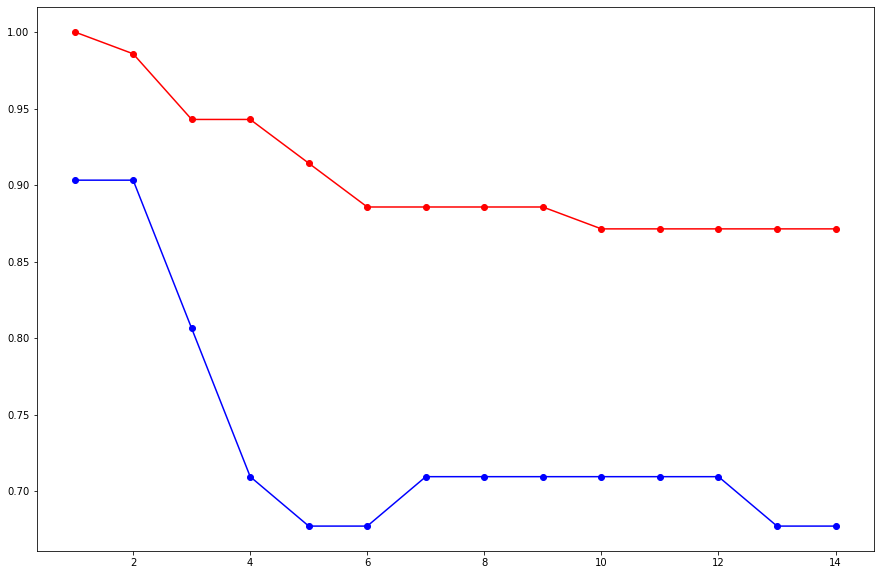

In [77]:
# creating empty list variable 
acc = []

for i in range(1,15,1):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train, Y_train)
    train_acc = np.mean(neigh.predict(X_train) == Y_train)
    test_acc = np.mean(neigh.predict(X_test) == Y_test)
    acc.append([train_acc,test_acc])

plt.plot(np.arange(1,15,1),[i[0] for i in acc],"ro-") # Training Accuracy
plt.plot(np.arange(1,15,1),[i[1] for i in acc], "bo-") # Test Accuracy

Lets Normalize our data and see

In [78]:
def norm_funct(i):
    x = (i-i.min())/ (i.max()-i.min())
    return(x)

norm = df.copy()

In [80]:
df_norm = norm_funct(norm.iloc[:,0:16])
df_norm

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.50,0.0,0.0,1.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.50,1.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.00,1.0,0.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.50,0.0,0.0,1.0
4,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.50,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.25,1.0,0.0,1.0
97,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.75,0.0,0.0,0.0
98,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.50,1.0,0.0,1.0
99,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.00,0.0,0.0,0.0


In [81]:
df_norm['Type'] = df['type']

In [82]:
df_norm

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,Type
0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.50,0.0,0.0,1.0,1
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.50,1.0,0.0,1.0,1
2,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.00,1.0,0.0,0.0,4
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.50,0.0,0.0,1.0,1
4,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.50,1.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.25,1.0,0.0,1.0,1
97,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.75,0.0,0.0,0.0,6
98,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.50,1.0,0.0,1.0,1
99,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.00,0.0,0.0,0.0,7


In [83]:
Y = df_norm.iloc[:,-1]
X = df_norm.iloc[:, 0:16]

In [84]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=111)

print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(70, 16) (31, 16) (70,) (31,)


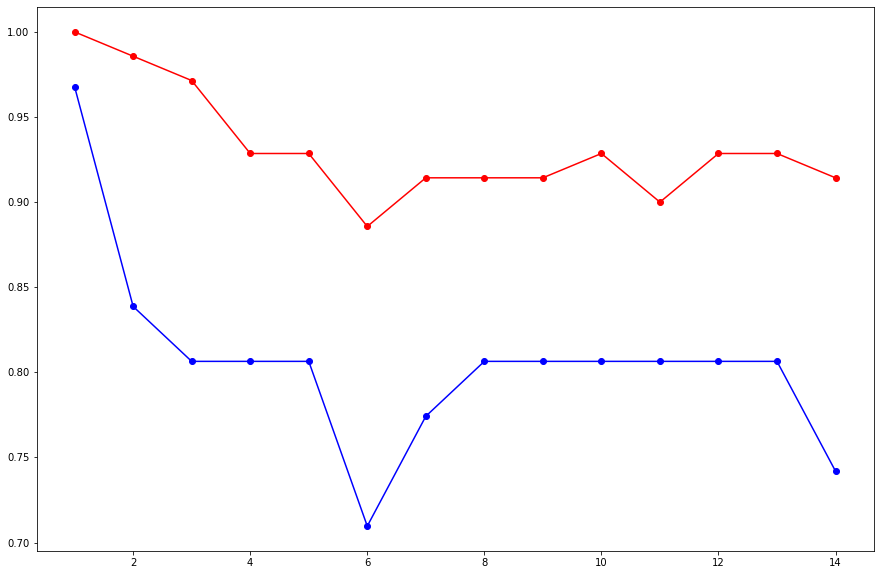

In [85]:
# creating empty list variable 
acc = []

for i in range(1,15,1):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train, Y_train)
    train_acc = np.mean(neigh.predict(X_train) == Y_train)
    test_acc = np.mean(neigh.predict(X_test) == Y_test)
    acc.append([train_acc,test_acc])

plt.plot(np.arange(1,15,1),[i[0] for i in acc],"ro-") # Training Accuracy
plt.plot(np.arange(1,15,1),[i[1] for i in acc], "bo-") # Test Accuracy

With normalization we can see with n = 5 we get better Training and Test accuracy

In [86]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [87]:
pred = knn.predict(X_test)
pred

array([7, 1, 7, 2, 1, 2, 1, 6, 2, 4, 1, 4, 4, 2, 4, 3, 1, 1, 6, 1, 7, 7,
       2, 1, 4, 4, 4, 4, 2, 1, 4], dtype=int64)

In [88]:
print(accuracy_score(Y_test, pred))
pd.crosstab(Y_test, pred, rownames = ['Actual'], colnames= ['Predictions']) 


# error on train data
pred_train = knn.predict(X_train)
print(accuracy_score(Y_train, pred_train))
pd.crosstab(Y_train, pred_train, rownames=['Actual'], colnames = ['Predictions'])

0.8064516129032258
0.9285714285714286


Predictions,1,2,3,4,6,7
Actual,,,,,,
1,33,0,0,0,0,0
2,0,15,0,0,0,0
3,0,0,1,1,0,0
4,0,0,0,7,0,0
5,0,0,0,1,0,0
6,0,0,0,0,6,0
7,0,0,0,0,3,3


From the above analyses, we can say we need to do the following:

- We need to work on the outliers, bringing the outlier values to their respective IQR
- We need to normalize our dataset
- We need to use Knn = 5 